# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

784


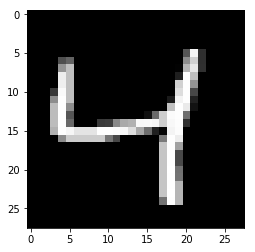

In [6]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

print(mnist.train.images.shape[1])

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [11]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32 # feel free to change this value

image_size = mnist.train.images.shape[1]

# Input and target placeholders
inputs_ = tf.placeholder(tf.float32, shape=[None, image_size], name="inputs")
targets_ = tf.placeholder(tf.float32, shape=[None, image_size], name="targets")

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name="output")

# Sigmoid cross-entropy loss
loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
# Mean of the loss
cost = tf.reduce_mean(loss)

# Adam optimizer
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [12]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [13]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6958
Epoch: 1/20... Training loss: 0.6922
Epoch: 1/20... Training loss: 0.6889
Epoch: 1/20... Training loss: 0.6854
Epoch: 1/20... Training loss: 0.6813
Epoch: 1/20... Training loss: 0.6766
Epoch: 1/20... Training loss: 0.6701
Epoch: 1/20... Training loss: 0.6626
Epoch: 1/20... Training loss: 0.6531
Epoch: 1/20... Training loss: 0.6439
Epoch: 1/20... Training loss: 0.6327
Epoch: 1/20... Training loss: 0.6207
Epoch: 1/20... Training loss: 0.6071
Epoch: 1/20... Training loss: 0.5893
Epoch: 1/20... Training loss: 0.5738
Epoch: 1/20... Training loss: 0.5571
Epoch: 1/20... Training loss: 0.5389
Epoch: 1/20... Training loss: 0.5235
Epoch: 1/20... Training loss: 0.5033
Epoch: 1/20... Training loss: 0.4880
Epoch: 1/20... Training loss: 0.4640
Epoch: 1/20... Training loss: 0.4493
Epoch: 1/20... Training loss: 0.4305
Epoch: 1/20... Training loss: 0.4165
Epoch: 1/20... Training loss: 0.4031
Epoch: 1/20... Training loss: 0.3904
Epoch: 1/20... Training loss: 0.3796
E

Epoch: 1/20... Training loss: 0.1994
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1954
Epoch: 1/20... Training loss: 0.2019
Epoch: 1/20... Training loss: 0.1928
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1999
Epoch: 1/20... Training loss: 0.1903
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1927
Epoch: 1/20... Training loss: 0.1942
Epoch: 1/20... Training loss: 0.1944
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1842
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1850
Epoch: 1/20... Training loss: 0.1920
Epoch: 1/20... Training loss: 0.1872
Epoch: 1/20... Training loss: 0.1852
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1875
Epoch: 1/20... Training loss: 0.1975
Epoch: 1/20... Training loss: 0.1885
Epoch: 1/20... Training loss: 0.1912
Epoch: 1/20... Training loss: 0.1874
E

Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1600
Epoch: 2/20... Training loss: 0.1528
Epoch: 2/20... Training loss: 0.1584
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1596
Epoch: 2/20... Training loss: 0.1570
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1640
Epoch: 2/20... Training loss: 0.1593
Epoch: 2/20... Training loss: 0.1594
Epoch: 2/20... Training loss: 0.1581
Epoch: 2/20... Training loss: 0.1568
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1530
Epoch: 2/20... Training loss: 0.1580
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1544
Epoch: 2/20... Training loss: 0.1589
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1592
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1560
Epoch: 2/20... Training loss: 0.1559
Epoch: 2/20... Training loss: 0.1532
E

Epoch: 3/20... Training loss: 0.1443
Epoch: 3/20... Training loss: 0.1403
Epoch: 3/20... Training loss: 0.1390
Epoch: 3/20... Training loss: 0.1412
Epoch: 3/20... Training loss: 0.1369
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1398
Epoch: 3/20... Training loss: 0.1330
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1420
Epoch: 3/20... Training loss: 0.1341
Epoch: 3/20... Training loss: 0.1463
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1347
Epoch: 3/20... Training loss: 0.1310
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1393
Epoch: 3/20... Training loss: 0.1355
Epoch: 3/20... Training loss: 0.1361
Epoch: 3/20... Training loss: 0.1334
Epoch: 3/20... Training loss: 0.1425
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1352
Epoch: 3/20... Training loss: 0.1337
Epoch: 3/20... Training loss: 0.1331
Epoch: 3/20... Training loss: 0.1335
E

Epoch: 4/20... Training loss: 0.1275
Epoch: 4/20... Training loss: 0.1297
Epoch: 4/20... Training loss: 0.1252
Epoch: 4/20... Training loss: 0.1300
Epoch: 4/20... Training loss: 0.1292
Epoch: 4/20... Training loss: 0.1205
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1240
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1203
Epoch: 4/20... Training loss: 0.1198
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1207
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1250
Epoch: 4/20... Training loss: 0.1263
Epoch: 4/20... Training loss: 0.1217
Epoch: 4/20... Training loss: 0.1230
Epoch: 4/20... Training loss: 0.1196
Epoch: 4/20... Training loss: 0.1306
Epoch: 4/20... Training loss: 0.1237
Epoch: 4/20... Training loss: 0.1244
Epoch: 4/20... Training loss: 0.1262
Epoch: 4/20... Training loss: 0.1212
Epoch: 4/20... Training loss: 0.1238
Epoch: 4/20... Training loss: 0.1274
Epoch: 4/20... Training loss: 0.1302
E

Epoch: 4/20... Training loss: 0.1187
Epoch: 4/20... Training loss: 0.1121
Epoch: 4/20... Training loss: 0.1117
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1167
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1149
Epoch: 4/20... Training loss: 0.1173
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1157
Epoch: 4/20... Training loss: 0.1168
Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1164
Epoch: 4/20... Training loss: 0.1180
Epoch: 4/20... Training loss: 0.1158
Epoch: 4/20... Training loss: 0.1109
Epoch: 4/20... Training loss: 0.1117
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1145
Epoch: 4/20... Training loss: 0.1210
Epoch: 4/20... Training loss: 0.1176
Epoch: 4/20... Training loss: 0.1140
Epoch: 4/20... Training loss: 0.1143
Epoch: 4/20... Training loss: 0.1138
Epoch: 4/20... Training loss: 0.1134
E

Epoch: 5/20... Training loss: 0.1078
Epoch: 5/20... Training loss: 0.1173
Epoch: 5/20... Training loss: 0.1062
Epoch: 5/20... Training loss: 0.1063
Epoch: 5/20... Training loss: 0.1069
Epoch: 5/20... Training loss: 0.1072
Epoch: 5/20... Training loss: 0.1112
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1123
Epoch: 5/20... Training loss: 0.1074
Epoch: 5/20... Training loss: 0.1097
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1114
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1083
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1115
Epoch: 5/20... Training loss: 0.1036
Epoch: 5/20... Training loss: 0.1095
Epoch: 5/20... Training loss: 0.1142
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1088
Epoch: 5/20... Training loss: 0.1104
Epoch: 5/20... Training loss: 0.1125
Epoch: 5/20... Training loss: 0.1113
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1090
E

Epoch: 6/20... Training loss: 0.1016
Epoch: 6/20... Training loss: 0.1040
Epoch: 6/20... Training loss: 0.1053
Epoch: 6/20... Training loss: 0.1023
Epoch: 6/20... Training loss: 0.1073
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1012
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1054
Epoch: 6/20... Training loss: 0.0998
Epoch: 6/20... Training loss: 0.1041
Epoch: 6/20... Training loss: 0.1007
Epoch: 6/20... Training loss: 0.1086
Epoch: 6/20... Training loss: 0.1055
Epoch: 6/20... Training loss: 0.1071
Epoch: 6/20... Training loss: 0.1069
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1037
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1046
Epoch: 6/20... Training loss: 0.1036
Epoch: 6/20... Training loss: 0.1033
E

Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1028
Epoch: 7/20... Training loss: 0.1038
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1033
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1005
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1009
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0990
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1019
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.0973
Epoch: 7/20... Training loss: 0.1026
Epoch: 7/20... Training loss: 0.0982
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1011
Epoch: 7/20... Training loss: 0.1002
Epoch: 7/20... Training loss: 0.1011
E

Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.0960
Epoch: 7/20... Training loss: 0.0974
Epoch: 7/20... Training loss: 0.0970
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0957
Epoch: 7/20... Training loss: 0.0985
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.0975
Epoch: 7/20... Training loss: 0.0995
Epoch: 7/20... Training loss: 0.0964
Epoch: 7/20... Training loss: 0.1021
Epoch: 7/20... Training loss: 0.1001
Epoch: 7/20... Training loss: 0.1029
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0996
Epoch: 7/20... Training loss: 0.0988
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.0999
Epoch: 7/20... Training loss: 0.0979
Epoch: 7/20... Training loss: 0.1004
Epoch: 7/20... Training loss: 0.0971
Epoch: 7/20... Training loss: 0.0977
Epoch: 7/20... Training loss: 0.0989
Epoch: 7/20... Training loss: 0.0987
E

Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0952
Epoch: 8/20... Training loss: 0.0960
Epoch: 8/20... Training loss: 0.0965
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.1001
Epoch: 8/20... Training loss: 0.0941
Epoch: 8/20... Training loss: 0.0966
Epoch: 8/20... Training loss: 0.0954
Epoch: 8/20... Training loss: 0.0949
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0977
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0936
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0950
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0984
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0953
E

Epoch: 9/20... Training loss: 0.1005
Epoch: 9/20... Training loss: 0.0945
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0972
Epoch: 9/20... Training loss: 0.0953
Epoch: 9/20... Training loss: 0.0963
Epoch: 9/20... Training loss: 0.0973
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0969
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0958
Epoch: 9/20... Training loss: 0.0999
Epoch: 9/20... Training loss: 0.0998
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0921
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0979
Epoch: 9/20... Training loss: 0.0962
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0944
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0977
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.1003
E

Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0974
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0961
Epoch: 10/20... Training loss: 0.0947
Epoch: 10/20... Training loss: 0.0914
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0950
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0987
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0939
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0990
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0976
Epoch: 10/20... Training loss: 0.0955
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20

Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0971
Epoch: 10/20... Training loss: 0.0910
Epoch: 10/20... Training loss: 0.0938
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0943
Epoch: 10/20... Training loss: 0.0906
Epoch: 10/20... Training loss: 0.0994
Epoch: 10/20... Training loss: 0.0929
Epoch: 10/20... Training loss: 0.0935
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0965
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0944
Epoch: 10/20... Training loss: 0.0979
Epoch: 10/20... Training loss: 0.0978
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0957
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0913
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0926
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0938
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0933
Epoch: 11/20... Training loss: 0.0951
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0941
Epoch: 11/20... Training loss: 0.0932
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0994
Epoch: 11/20... Training loss: 0.0971
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0920
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0915
Epoch: 11/20... Training loss: 0.0953
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0957
Epoch: 11/20... Training loss: 0.0925
Epoch: 11/20... Training loss: 0.0987
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0952
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0942
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0981
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0949
Epoch: 12/20... Training loss: 0.0951
Epoch: 12/20... Training loss: 0.0928
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.0991
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0948
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0934
Epoch: 12/20... Training loss: 0.0945
Epoch: 12/20... Training loss: 0.0923
Epoch: 12/20... Training loss: 0.0943
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0931
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0905
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0932
Epoch: 13/20... Training loss: 0.0970
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0917
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0954
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0910
Epoch: 13/20... Training loss: 0.0980
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0920
Epoch: 13/20... Training loss: 0.0953
Epoch: 13/20... Training loss: 0.0950
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0929
Epoch: 13/20... Training loss: 0.1000
Epoch: 13/20... Training loss: 0.0966
Epoch: 13/20... Training loss: 0.0951
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0948
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0940
Epoch: 13/20... Training loss: 0.0971
Epoch: 13/20... Training loss: 0.0941
Epoch: 13/20... Training loss: 0.0974
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0930
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0945
Epoch: 13/20... Training loss: 0.0967
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0922
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0943
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0944
Epoch: 14/20... Training loss: 0.0963
Epoch: 14/20... Training loss: 0.0932
Epoch: 14/20... Training loss: 0.0939
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0934
Epoch: 14/20... Training loss: 0.0935
Epoch: 14/20... Training loss: 0.0917
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0940
Epoch: 14/20... Training loss: 0.0924
Epoch: 14/20... Training loss: 0.0952
Epoch: 14/20... Training loss: 0.0961
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0948
Epoch: 14/20... Training loss: 0.0967
Epoch: 14/20... Training loss: 0.0976
Epoch: 14/20... Training loss: 0.0921
Epoch: 14/20... Training loss: 0.0930
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0911
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0924
Epoch: 15/20... Training loss: 0.0922
Epoch: 15/20... Training loss: 0.0887
Epoch: 15/20... Training loss: 0.0918
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0940
Epoch: 15/20... Training loss: 0.0881
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0948
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0910
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0931
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0929
Epoch: 15/20... Training loss: 0.0934
Epoch: 15/20... Training loss: 0.0946
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0960
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0910
Epoch: 16/20... Training loss: 0.0967
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0942
Epoch: 16/20... Training loss: 0.0925
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20

Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0955
Epoch: 16/20... Training loss: 0.0943
Epoch: 16/20... Training loss: 0.0973
Epoch: 16/20... Training loss: 0.0934
Epoch: 16/20... Training loss: 0.0928
Epoch: 16/20... Training loss: 0.0945
Epoch: 16/20... Training loss: 0.0939
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0933
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0953
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0949
Epoch: 16/20... Training loss: 0.0915
Epoch: 16/20... Training loss: 0.0918
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0956
Epoch: 16/20... Training loss: 0.1007
Epoch: 16/20... Training loss: 0.0971
Epoch: 16/20... Training loss: 0.0930
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0951
Epoch: 16/20... Training loss: 0.0950
Epoch: 16/20... Training loss: 0.0920
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0910
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0901
Epoch: 17/20... Training loss: 0.0938
Epoch: 17/20... Training loss: 0.0965
Epoch: 17/20... Training loss: 0.0935
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0898
Epoch: 17/20... Training loss: 0.0919
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0946
Epoch: 17/20... Training loss: 0.0953
Epoch: 17/20... Training loss: 0.0967
Epoch: 17/20... Training loss: 0.0921
Epoch: 17/20... Training loss: 0.0963
Epoch: 17/20... Training loss: 0.0929
Epoch: 17/20... Training loss: 0.0907
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0970
Epoch: 17/20... Training loss: 0.0931
Epoch: 17/20... Training loss: 0.0955
Epoch: 17/20... Training loss: 0.0908
Epoch: 17/20... Training loss: 0.0945
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0936
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0949
Epoch: 18/20... Training loss: 0.0896
Epoch: 18/20... Training loss: 0.0919
Epoch: 18/20... Training loss: 0.0902
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0920
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0899
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0917
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0932
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0943
Epoch: 18/20... Training loss: 0.0925
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0937
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0953
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0936
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0976
Epoch: 19/20... Training loss: 0.0889
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0906
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0903
Epoch: 19/20... Training loss: 0.0954
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0936
Epoch: 19/20

Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0963
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0928
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0933
Epoch: 19/20... Training loss: 0.0944
Epoch: 19/20... Training loss: 0.0958
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0919
Epoch: 19/20... Training loss: 0.0956
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0921
Epoch: 19/20... Training loss: 0.0953
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0931
Epoch: 19/20... Training loss: 0.0914
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0969
Epoch: 19/20... Training loss: 0.0955
Epoch: 19/20... Training loss: 0.0895
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0958
Epoch: 20/20... Training loss: 0.0918
Epoch: 20/20... Training loss: 0.0905
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0931
Epoch: 20/20... Training loss: 0.0955
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0929
Epoch: 20/20... Training loss: 0.0951
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0914
Epoch: 20/20... Training loss: 0.0969
Epoch: 20/20... Training loss: 0.0910
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0932
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0948
Epoch: 20/20... Training loss: 0.0962
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

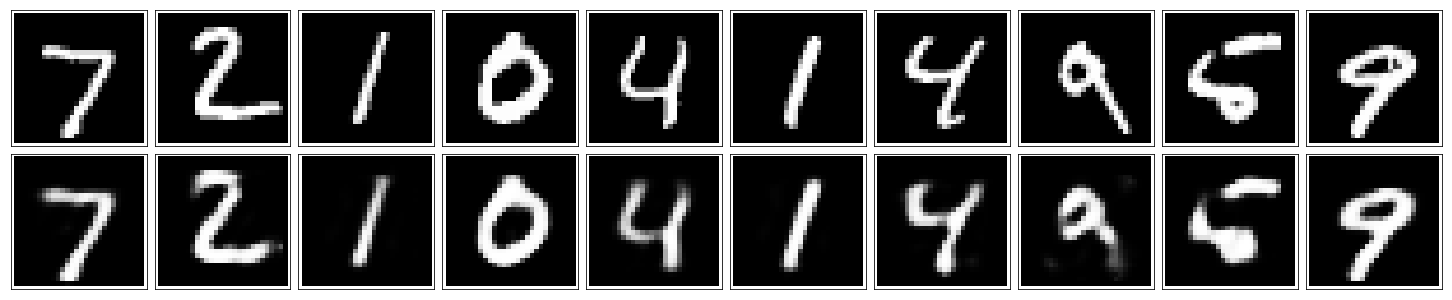

In [14]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [15]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.